In [13]:
#import matplotlib.pyplot as plt
#import numpy as np
#import seaborn as sns
#import math
#from scipy import stats
#print("imported " + str(len(raw)) + " rows")
#raw.columns.tolist()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
#from IPython.display import HTML, display
#import tabulate
import numpy as np
#from matplotlib import cm
raw = pd.pandas.read_csv('featured_variables.csv',sep=",",low_memory=False)


#def print_list(list_in):
#    display(HTML(tabulate.tabulate(list_in, tablefmt='html')))

# Setup Data Set


In [14]:
### CLEAN DATA FUNC

def clean_func(data,do_imputation=True): 
    ## DO IMPUTATION 
    # living_area
    data_ = data
    if (do_imputation):
        floor = Imputer(missing_values="NaN", strategy="mean")
        floor.fit(data_[["floor"]])
        data_['floor'] = floor.transform(data_[["floor"]]).ravel()
        # rooms
        imp_fare = Imputer(missing_values="NaN", strategy="mean")
        imp_fare.fit(data_[["rooms"]])
        data_[["rooms"]]=imp_fare.transform(data_[["rooms"]]).ravel() 
        # floor
        imp_fare = Imputer(missing_values="NaN", strategy="mean")
        imp_fare.fit(data_[["floor"]])
        data_[["floor"]]=imp_fare.transform(data_[["floor"]]).ravel() 
        # rent
        imp_fare = Imputer(missing_values="NaN", strategy="mean")
        imp_fare.fit(data_[["rent"]])
        data_[["rent"]]=imp_fare.transform(data_[["rent"]]).ravel() 
        # construction_year
        imp_fare = Imputer(missing_values="NaN", strategy="mean")
        imp_fare.fit(data_[["construction_year"]])
        data_[["construction_year"]]=imp_fare.transform(data_[["construction_year"]]).ravel() 
        # distance_ocean
        imp_fare = Imputer(missing_values="NaN", strategy="mean")
        imp_fare.fit(data_[["distance_ocean"]])
        data_[["distance_ocean"]]=imp_fare.transform(data_[["distance_ocean"]]).ravel() 
    
    ## REMOVE ROWS w. NULL
    data = data[pd.notnull(data).all(axis=1)]
    
    ### Create ONE-HOT variables for area
    #area_from_geo = pd.get_dummies(data['area_from_geo'])
    #data = pd.concat([area_from_geo,data],axis=1)
    #
    return data


In [15]:
print(len(raw))
data = clean_func(raw,do_imputation=False)
print(len(data))

48568
31459


In [29]:
## set predictors

## set numeric predictors
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
numeric_columns = data.select_dtypes(include=num_types).columns

target_name = 'sqm_sold_price'
predictors_names = numeric_columns[(numeric_columns != target_name) & (numeric_columns != 'sqm_list_price')]


In [30]:
#data.iloc[:, train_data_numeric_columns != target_name]

In [31]:
train_data_predictors = data[predictors_names]
train_data_target = data[target_name].values

In [32]:
## Split Train/test
X_train, X_test, y_train, y_test = train_test_split(train_data_predictors, train_data_target, test_size=0.33, random_state=42)



### Linear Regression

explained_variance_score:
0.8927557860746282
mean_squared_error:
45909260.82543496


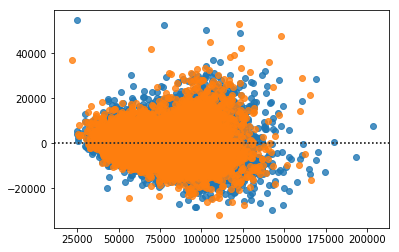

In [20]:
## TRAIN MODEL
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()

lin_reg.fit(X_train[predictors_names],y_train)

#print("Coefficients")
#print_list(list(zip(predictors_names,lin_reg.coef_)))

## PREDICT
lin_reg_pred_y_test = lin_reg.predict(X_test[predictors_names])
lin_reg_pred_y_train = lin_reg.predict(X_train[predictors_names])


## METRICS
import seaborn as sns
explained_variance_score = 1-np.var(y_test - lin_reg_pred_y_test)/np.var(y_test)
print("explained_variance_score:")
print(explained_variance_score)
print("mean_squared_error:")
print(mean_squared_error(lin_reg_pred_y_test,y_test))

#%matplotlib notebook
sns.residplot(lin_reg_pred_y_train, y_train, label="train_error");
sns.residplot(lin_reg_pred_y_test, y_test, label="test_error");
plt.show()


### Random forest regressor

 


In [33]:
## TRAIN MODEL
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=7, random_state=0, n_estimators=80)
rf_reg.fit(X_train[predictors_names],y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

<BarContainer object of 18 artists>

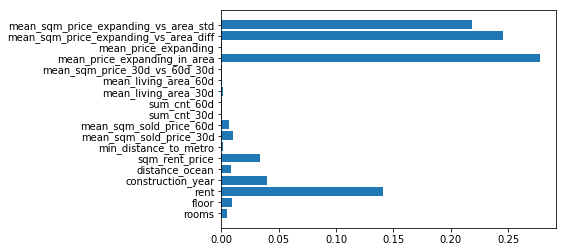

In [34]:
#list(zip(predictors_names,rf_reg.feature_importances_))
plt.barh(predictors_names, rf_reg.feature_importances_)


In [35]:
## PREDICT
rf_reg_pred_y_test = rf_reg.predict(X_test[predictors_names])
rf_reg_pred_y_train = rf_reg.predict(X_train[predictors_names])


In [36]:
y_test#rf_reg_pred_y_test

array([84313.7255, 78409.0909, 59740.2597, ..., 96363.6364, 73902.439 ,
       46031.746 ])

Mean error train:
6605.769218858539
Mean error test:
6809.927646314942
Explained variance score
0.8040973081502365


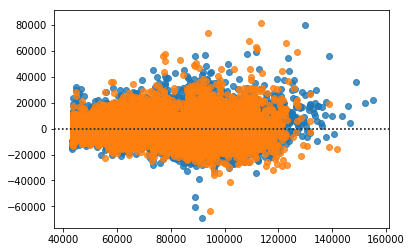

In [37]:
## METRICS
import seaborn as sns
errors_tets = (((y_test - rf_reg_pred_y_test)**2)**0.5)
errors_train = (((y_train - rf_reg_pred_y_train)**2)**0.5)
explained_variance_score = 1-np.var(y_test - rf_reg_pred_y_test)/np.var(y_test)
print("Mean error train:")
print(errors_train.mean())
print("Mean error test:")
print(errors_tets.mean())
print("Explained variance score")
print(explained_variance_score)

#%matplotlib notebook
sns.residplot(rf_reg_pred_y_train, y_train, label="train_error");
sns.residplot(rf_reg_pred_y_test, y_test, label="test_error");
plt.show()